In [1]:
import tensorflow as tf
import cv2
import imghdr
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_path = '/content/drive/MyDrive/Study/Projects/Image Classifier/images'

In [3]:
valid_img_exts = ['jpg', 'png', 'jpeg', 'bmp']

In [4]:
os.listdir(data_path)

['Sad', 'Happy']

In [5]:
for data_class in os.listdir(data_path):
  for img in os.listdir(os.path.join(data_path, data_class)):
    img_path = os.path.join(data_path, data_class, img)

    try:
      img_array = cv2.imread(img_path)
      if imghdr.what(img_path) not in ['jpg', 'png', 'jpeg', 'bmp']:
        print(f'Removed: {img_path}')
        os.remove(img_path)
    except:
      print(f'Removed: {img_path}')
      os.remove(img_path)

In [6]:
from inspect import signature
signature(tf.keras.utils.image_dataset_from_directory)

<Signature (directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>

In [7]:
data = tf.keras.utils.image_dataset_from_directory(data_path, image_size=(100, 100))

Found 1149 files belonging to 2 classes.


In [8]:
type(data)

tensorflow.python.data.ops.batch_op._BatchDataset

In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

In [11]:
batch[0].shape

(32, 100, 100, 3)

In [12]:
batch[1].shape

(32,)

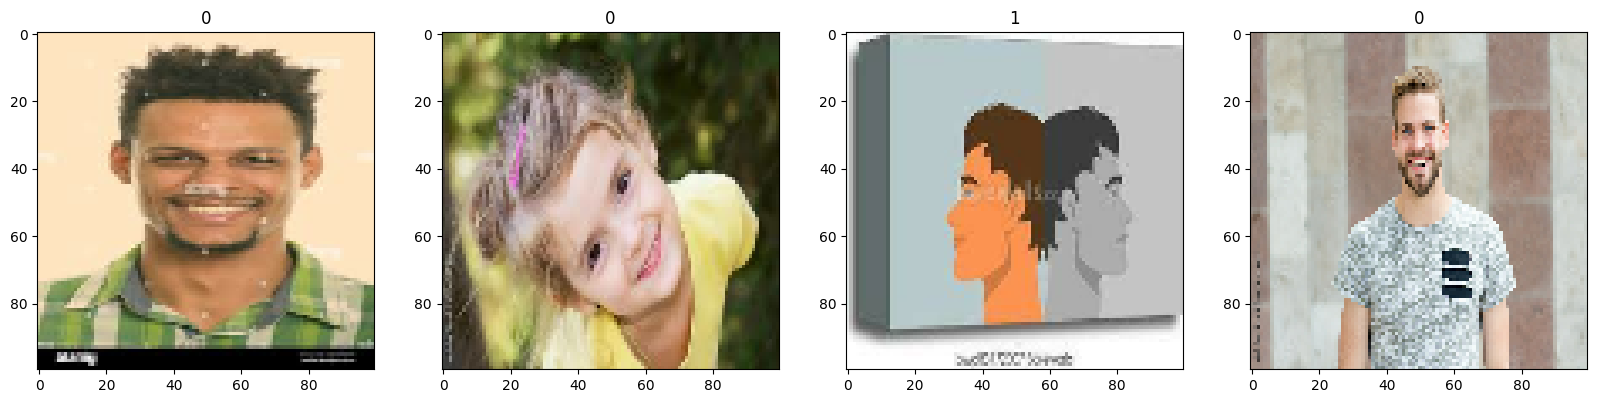

In [13]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for i in range(4):
  ax[i].imshow(batch[0][i].astype(int))
  ax[i].title.set_text(batch[1][i])

In [14]:
data = data.map(lambda x, y : (x/255, y))

In [15]:
scaled_iterator = data.as_numpy_iterator()

In [16]:
batch = scaled_iterator.next()

In [17]:
batch[0].shape

(32, 100, 100, 3)

In [18]:
batch[0].min()

0.0

In [19]:
batch[0].max()

1.0

In [20]:
len(data)

36

In [21]:
# 70% training, 20% validation, 10% testing

train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1) + 1

#confirmation
print(train_size + val_size + test_size)

36


In [22]:
train = data.take(train_size)
validation = data.skip(train_size).take(val_size)
test = data.skip(train_size).skip(val_size).take(test_size)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 16)        0

In [27]:
hist = model.fit(train, epochs=30, validation_data=validation)

Epoch 1/30
25/25 [==============================] - 18s 673ms/step - loss: 0.6696 - accuracy: 0.5913 - val_loss: 0.6455 - val_accuracy: 0.6116
Epoch 2/30
25/25 [==============================] - 13s 477ms/step - loss: 0.6479 - accuracy: 0.6137 - val_loss: 0.6243 - val_accuracy: 0.6652
Epoch 3/30
25/25 [==============================] - 13s 513ms/step - loss: 0.6125 - accuracy: 0.6762 - val_loss: 0.6053 - val_accuracy: 0.6696
Epoch 4/30
25/25 [==============================] - 13s 498ms/step - loss: 0.5763 - accuracy: 0.7188 - val_loss: 0.6045 - val_accuracy: 0.7054
Epoch 5/30
25/25 [==============================] - 17s 666ms/step - loss: 0.5603 - accuracy: 0.7287 - val_loss: 0.5490 - val_accuracy: 0.7723
Epoch 6/30
25/25 [==============================] - 19s 706ms/step - loss: 0.5270 - accuracy: 0.7325 - val_loss: 0.5620 - val_accuracy: 0.7054
Epoch 7/30
25/25 [==============================] - 14s 515ms/step - loss: 0.4853 - accuracy: 0.7837 - val_loss: 0.5788 - val_accuracy: 0.7054

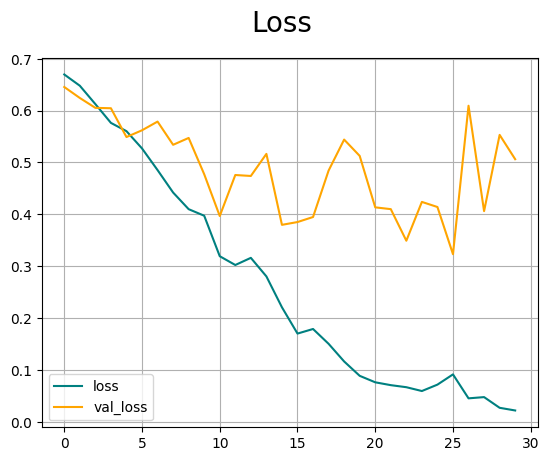

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="lower left")
plt.grid()
plt.show()

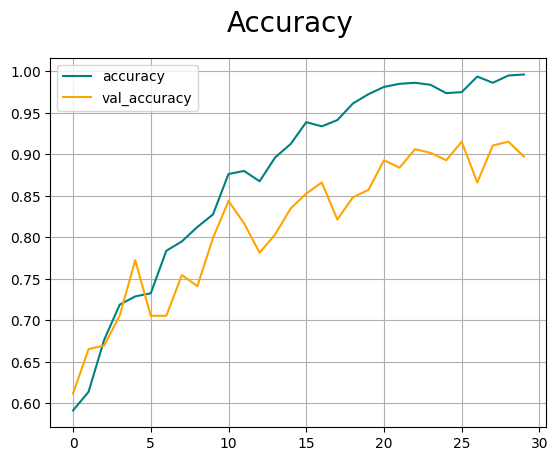

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [41]:
for batch in test.as_numpy_iterator():
    X_test, y_test = batch
    y_pred = model.predict(X_test)
    p = Precision()
    r = Recall()
    ba = BinaryAccuracy()
    p.update_state(y_test, y_pred)
    r.update_state(y_test, y_pred)
    ba.update_state(y_test, y_pred)
    print(f'Precision: {p.result()},       Recall: {r.result()},       Binary Accuracy: {ba.result()}')

1/1 [==============================] - 0s 46ms/step
Precision: 0.9166666865348816,       Recall: 0.8461538553237915,       Binary Accuracy: 0.90625
1/1 [==============================] - 0s 45ms/step
Precision: 0.9090909361839294,       Recall: 0.8333333134651184,       Binary Accuracy: 0.90625
1/1 [==============================] - 0s 46ms/step
Precision: 0.8888888955116272,       Recall: 1.0,       Binary Accuracy: 0.96875
1/1 [==============================] - 0s 44ms/step
Precision: 0.6428571343421936,       Recall: 0.8999999761581421,       Binary Accuracy: 0.7931034564971924
